# Dependencies

In [2]:
import pandas as pd                       #package for data analysis
import numpy as np                        #package for handling arrays
import seaborn as sns                     #package for data visualizations
import matplotlib.pyplot as plt           #pakcage for data visualizations
from textblob import TextBlob             #package for text analysis
import neattext as nt                     #package for text cleaning
import re                                 #package for matching data patterns

In [ ]:
import PyPDF2
import re
import os

for foldername,subfolders,files in os.walk(r"path_where files are store"):
    for file in files:
        # open the pdf file
        object = PyPDF2.PdfFileReader(os.path.join(foldername,file))

        # get number of pages
        NumPages = object.getNumPages()

        # define keyterms
        String = "New York State Real Property Law"

        # extract text and do the search
        for i in range(0, NumPages):
            PageObj = object.getPage(i)
            Text = PageObj.extractText() 

# Data Extraction from Transcript File (pdf)

In [3]:
import PyPDF2                             #package for data extraction from pdf
from PyPDF2 import PdfFileReader

In [4]:
pdfFileObject = open('p7.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObject)

In [5]:
text=''
for i in range(0,pdfReader.numPages):
    # creating a page object
    pageObj = pdfReader.getPage(i)
    # extracting text from page
    text=text+pageObj.extractText()
print(text)

Amazon.com, Inc. (AMZN) Q2 2022 Results - Earnings Call
Transcript
Jul. 28, 2022 9:06 PM ET |Amazon.com, Inc. (AMZN)
SA T ranscripts
129.92K  Follower s
Q2: 2022-07-28 Earnings Summary
EPS of -$0.20 misses by $0.32 | Revenue of $121.23B  (7.21% Y/Y)  beats by $2.09BTranscripts Technology
Play Call
 Slides
 Press Release
 10-Q
Amazon.com, Inc. ( NASDAQ: AMZN ) Q2 2022 Earnings Conference Call July 28, 2022 5:30 PM ET
Company Participants
Dave Fildes - Director of Investor Relations
Brian Olsavsky - Senior V ice President and Chief Financial Of ficerConference Call Participants
Brian Nowak - Morgan Stanley
Douglas Anmuth - JPMorgan Chase & Co.
Eric Sheridan - Goldman Sachs Group, Inc.
Jason Helfstein - Oppenheimer & Co. Inc.
Youssef Squali - T ruist Securities, Inc.
Stephen Ju - Credit Suisse AG
Operator
Thank you for standing by . Good day , everyone, and welcome to the Amazon.com Q2 2022 Financial Results
Teleconference. At this time, all participants are in a listen-only mode. After t

# Sentence Tokenization

in sentence tokenization we created separated sentence of amazon call transcript and stored them in a list with help of nltk sentence tokenizer

In [9]:
sents=[]

In [10]:
from nltk.tokenize import sent_tokenize     #nltk sentence tokenizer
text=sent_tokenize(text)
for sent in text:
    sents.append(sent)
#     print(text)

In [11]:
sentences=pd.DataFrame(sents,columns =['Sentences'])

### Saving the sentence in csv file

In [12]:
sentences.to_csv('sentences.csv')

### Reading the Sentences file

In [32]:
sent_df=pd.read_csv('sentences.csv')

In [33]:
sent_df

,Unnamed: 0,Sentences
0,0,"Amazon.com, Inc. (AMZN) Q2 2022 Results - Earn..."
1,1,"28, 2022 9:06 PM ET |Amazon.com, Inc. (AMZN)\n..."
2,2,"Good day , everyone, and welcome to the Amazon..."
3,3,"At this time, all participants are in a listen..."
4,4,"After the presentation, we will conduct a\nque..."
...,...,...
298,298,A replay will be available on our Investor Rel...
299,299,"W e appreciate your interest in Amazon, and we..."
300,300,Operator\nThis concludes today's conference call.
301,301,Thank you all for your participation.


# NLP Analaysis

In [34]:
import spacy                            #premium NLP package for text analysis
nlp = spacy.load("en_core_web_sm")      #spacy small model 

### Text Metrices

In [10]:
from neattext import TextMetrics
docx = TextMetrics()
docx.text = text
docx.count_vowels()
docx.count_consonants()
docx.count_stopwords()
docx.word_stats()

{'text_length': 36107,
 'num_of_vowels': 11072,
 'num_of_consonants': 17477,
 'num_of_stopwords': 2852,
 'vowels_stats': {'a': 2235, 'e': 3418, 'i': 2121, 'o': 2320, 'u': 978},
 'consonants_stats': {'b': 356,
  'c': 849,
  'd': 966,
  'f': 557,
  'g': 625,
  'h': 1041,
  'j': 47,
  'k': 221,
  'l': 1079,
  'm': 652,
  'n': 2222,
  'p': 669,
  'q': 149,
  'r': 1972,
  's': 1874,
  't': 2634,
  'v': 369,
  'w': 583,
  'x': 86,
  'y': 492,
  'z': 34}}

# Parts of Speech Counts

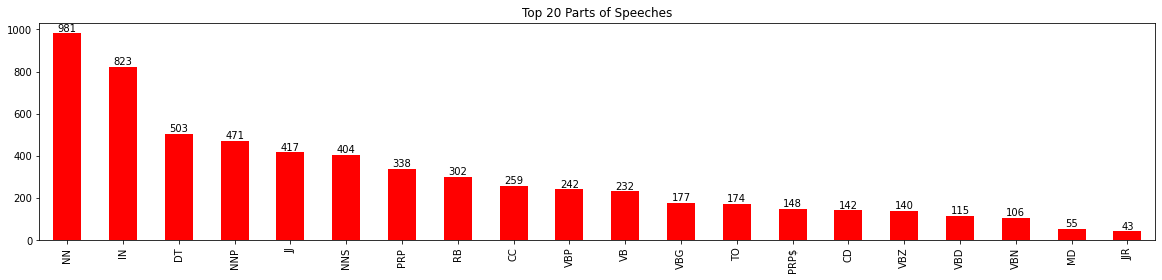

In [11]:
fig,ax = plt.subplots(figsize=(20,4))  #define figure size
blob = TextBlob(str(text))   #comments variable contains all the comments
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar',color='red')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Parts of Speeches")
plt.show()

### Named Entities Recognition

In [12]:
import spacy
from spacy import displacy
# text = " ".join(sent_df)
doc = nlp(text)
displacy.serve(doc, style="ent")

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\spacy\displacy\__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [15]:
def entity_entractor(text):
    text=re.sub("\n","      ",text)
    docx=nlp(text)
    ents_list=[(ent.text,ent.label_) for ent in docx.ents]
    df=pd.DataFrame(ents_list,columns=["Entity","Tag"])
#     df["Entity"]=df["Entity"].apply(lambda x:nt.remove_special_characters(x))
    return df

In [16]:
entities=entity_entractor(text)

In [17]:
persons=entities[entities["Tag"]=="PERSON"]["Entity"]
organizations=entities[entities["Tag"]=="ORG"]["Entity"]

In [18]:
persons=persons[persons.str.len()>4]

### Speakers in Amazon Call

In [19]:
persons=persons.drop_duplicates()

In [20]:
persons

15                             Dave Fildes
16                 Brian Olsavsky - Senior
17                    Brian Nowak - Morgan
18                          Douglas Anmuth
20     Eric Sheridan - Goldman Sachs Group
21         Jason Helfstein - Oppenheimer &
22                      Youssef Squali - T
24           Stephen Ju - Credit Suisse AG
31                          Brian Olsavsky
47                                   Brian
48                    Brian OlsavskyThanks
125                             Riot Games
177                            Brian Nowak
179                      Brian NowakThanks
211                            Doug Anmuth
220                     Brian OlsavskySure
227                           Anmuth      
249                          Eric Sheridan
262                         Dave FildesYes
265                                Freevee
271                        Jason Helfstein
273                  Jason HelfsteinThanks
302                    Youssef SqualiGreat
316        

### Organizations

In [23]:
organizations=organizations.drop_duplicates()
organizations=organizations.str.strip()
organizations

0                  Amazon.com, Inc.
1                              AMZN
10                           NASDAQ
14     ET      Company Participants
19             JPMorgan Chase & Co.
23                 Securities, Inc.
25                       Amazon.com
32                              CFO
38                              SEC
42                               IR
78                           Amazon
85                              NFL
87                   Night Football
123            Amazon W eb Services
124                 Delta Air Lines
178                  Morgan Stanley
212                        JPMorgan
215                              WS
216                    the      35%
248                     OperatorOur
250                   Goldman Sachs
253              North      America
256                    Connected TV
266                    Amazon Music
272                     Oppenheimer
275                              3P
323                   Credit Suisse
334                         

### Removing Short Sentences

some sentences contain information about speakers and date release of transcript. These sentences are very short and are not meaningful for us, so that we remove all the sentence which have not length over 20 characters

In [35]:
long_sent=sent_df[sent_df['Sentences'].str.len()>20]

In [36]:
long_sent.columns=['Index','Long_Sentences']

# Sentiment Analysis

In [37]:
# !pip install vadersentiment

### Why Vader

Study shows that VADER performs as good as individual human raters at matching ground truth. Further inspecting the F1 scores (classification accuracy), we see that VADER (0.96) outperforms individual human raters (0.84) at correctly labelling the sentiment of tweets into positive, neutral, or negative classes.

ADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

Further inspecting the F1 scores (classification accuracy), we see that VADER (0.96) outperforms individual human raters (0.84) at correctly labelling the sentiment of tweets into positive, neutral, or negative classes.

The reason behind this is that VADER is sensitive to both Polarity (whether the sentiment is positive or negative) and Intensity (how positive or negative is sentiment) of emotions.

VADER incorporates this by providing a Valence Score to the word into consideration. This brings us to the next section.

It is quite easy to implement and does not need specific text preprocessings

# Why not  to remove Stopwords

stopwords carry semantics of a sentence, if we remove them, it is hard to express feeling of a sentence
therefore we did not remove stopwords for better accuracy and sentiment classification

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer   #NLTK packahe for sentiment analysis
sent_anal_obj=SentimentIntensityAnalyzer()

In [39]:
def sentiment_tag(polarity):
    if polarity >= 0.05 :
        return "Positive"
    elif polarity <= - 0.05:
        return "Negative"
    else:
        return "Neutral"

In [40]:
def sentiment_score(my_text):
  sentimnent_dict=sent_anal_obj.polarity_scores(str(my_text))
  return sentimnent_dict['compound']

In [41]:
long_sent['Sentiment_Score']=long_sent['Long_Sentences'].apply(lambda x:sentiment_score(x))

<ipython-input-41-94becdc3edc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_sent['Sentiment_Score']=long_sent['Long_Sentences'].apply(lambda x:sentiment_score(x))


In [42]:
long_sent['Sentiment_Tag']=long_sent['Sentiment_Score'].apply(lambda x:sentiment_tag(x))

<ipython-input-42-5f4a0fbf4c03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_sent['Sentiment_Tag']=long_sent['Sentiment_Score'].apply(lambda x:sentiment_tag(x))


In [43]:
def make_plots(feature, title="", limited=False, n=10):
    # print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    # print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    # print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

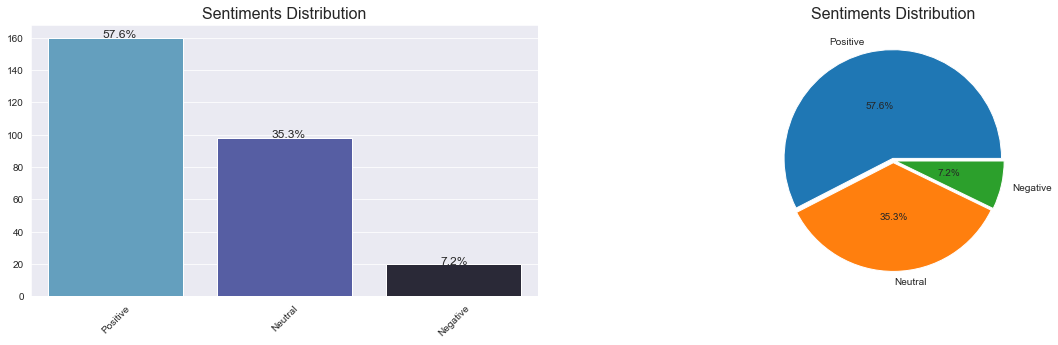

In [44]:
make_plots(long_sent['Sentiment_Tag'],"Sentiments Distribution")

Most of sentences are postive its mean speakers are discussing something positive aspect 
that can investor to input their money on right time in the right organization/section.

# Polarity Ranges

Polarity of sentence defines its probability to be classified as positive or negative sentence
As polarity values go towards 1 its become positive sentiment and as value heads towards 0 it is 
classified as negative. At middle of 0-1 that is 0.5 sentence is considered neutral.

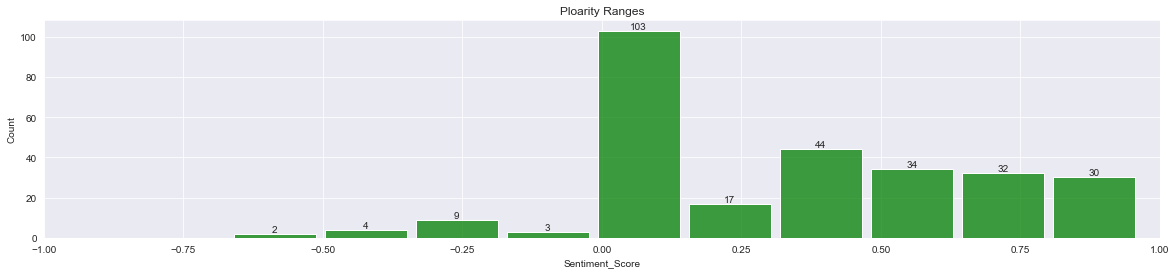

In [30]:
fig,ax = plt.subplots(figsize=(20,4))
sns.histplot(data=long_sent, x='Sentiment_Score',shrink=.9,bins=10,color='green')
ax.set(xlim=(-1, 1))
for container in ax.containers:
    ax.bar_label(container)
ax.set(title="Ploarity Ranges")
plt.show()

# Emotion Classification

In [77]:
! pip install transformers -q       #installing pre-trained hugging face model
from transformers import pipeline
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')  #pre-trained emtion classifier
# EmoRoBERTa can classify 28 emotions

You should consider upgrading via the 'c:\users\zee tech\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [78]:
long_sent['Emotions']=long_sent['Long_Sentences'].apply(emotion)

<ipython-input-78-d237f655cb63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_sent['Emotions']=long_sent['Long_Sentences'].apply(emotion)


In [81]:
def extract_em(em_dict):
  return em_dict[0]['label'] 
  # print(em_dict[0]['label'])

In [82]:
long_sent['Emotions_Label']=long_sent['Emotions'].apply(lambda x:extract_em(x))

<ipython-input-82-c802ed7ea095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_sent['Emotions_Label']=long_sent['Emotions'].apply(lambda x:extract_em(x))


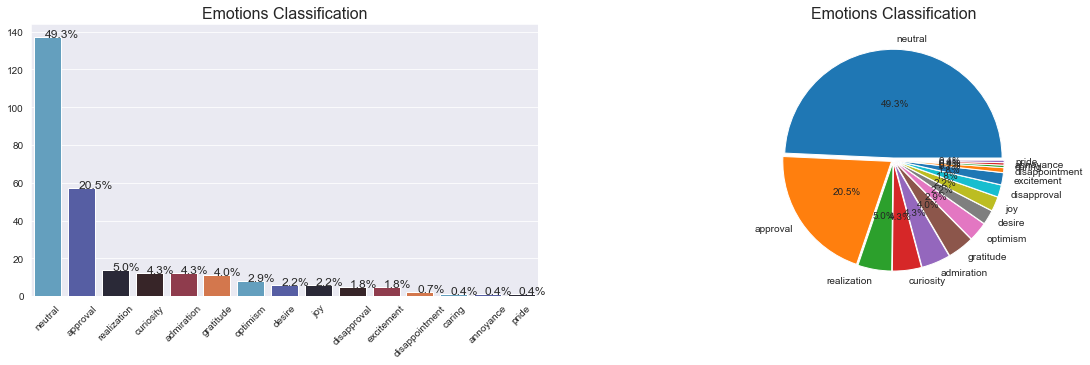

In [84]:
make_plots(long_sent['Emotions_Label'],'Emotions Classification')

Emotion analysis can be another factor for encouraging investors/users. Emotion of speakers can addect persons looking for opportunities in the organization. Very less number of negative feelings in the transcript, no doubt this is a positive meeting.